,T(min),TI2,TI3,TI4,TI5,TI10,TI11,TI12,PD
0,0,82.5,80.8,73.7,65.7,18.7,18.9,61.8,23
1,4,83.3,81.6,76.8,63.9,18.8,19.2,61.9,23
2,8,83.7,81.6,76.8,62.8,18.7,19.3,71.8,23
3,12,83.9,81.4,76.7,62.4,18.8,19.4,61.9,23
4,16,84.2,81.7,73.6,62.4,18.8,19.4,61.9,23
5,20,84.5,82.2,76.5,62.4,18.7,19.5,61.9,23


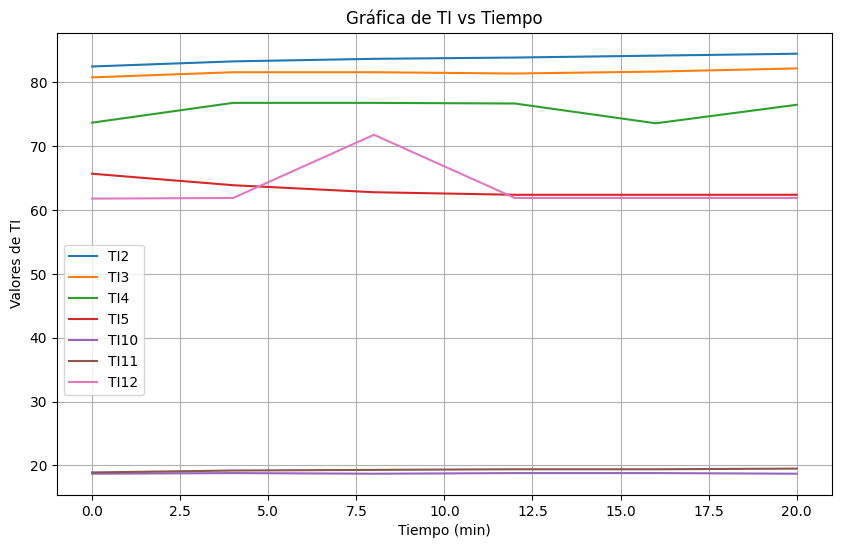

,Fase,Composicion,IR
0,Destilado,0.992920,1.3287
1,Residuo,0.157522,1.3759


In [226]:
import pandas as pd 
from IPython.display import display
import numpy as np
import matplotlib.pyplot as plt
#indices de refraccion, ND
IR_prop = 1.3848
IR_met = 1.3283
IR_destilado = 1.3287
IR_Residuo = 1.3759
#composicion destilado
xD = (IR_destilado - IR_prop) / (IR_met - IR_prop)
xW = (IR_Residuo - IR_prop) / (IR_met - IR_prop)
#tabla de temperaturas
Tabla= {
    'T(min)' : [0, 4, 8, 12, 16, 20],
    'TI2' : [82.5, 83.3, 83.7, 83.9, 84.2, 84.5],
    'TI3' : [80.8, 81.6, 81.6, 81.4, 81.7, 82.2],
    'TI4' : [73.7, 76.8, 76.8, 76.7, 73.6, 76.5],
    'TI5' : [65.7, 63.9, 62.8, 62.4, 62.4, 62.4],
    'TI10' : [18.7, 18.8, 18.7, 18.8, 18.8, 18.7],
    'TI11' : [18.9, 19.2, 19.3, 19.4, 19.4,19.5],
    'TI12' : [61.8, 61.9, 71.8, 61.9, 61.9, 61.9],
    'PD' : [23, 23, 23, 23, 23, 23], #mmHg
}
df = pd.DataFrame(Tabla)
x1 = [0, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95, 1]
y1 = [0, 0.146, 0.268, 0.371, 0.459, 0.534, 0.599, 0.656, 0.704, 0.747, 0.785, 0.818, 0.848, 0.875, 0.899, 0.92, 0.939, 0.957, 0.972, 0.987, 1]
# Mostrar el DataFrame
display(df)
tabla_composicion = {
    'Fase' : ['Destilado', 'Residuo'],
    'Composicion' : [xD, xW],
    'IR' : [IR_destilado, IR_Residuo]
}

# Graficar todas las columnas excepto la última ("PD")
plt.figure(figsize=(10, 6))
for column in df.columns[1:-1]:  # Omitir la primera columna y la última columna
    plt.plot(df['T(min)'], df[column], label=column)

plt.xlabel('Tiempo (min)')
plt.ylabel('Valores de TI')
plt.title('Gráfica de TI vs Tiempo')
plt.legend(loc='lower left', bbox_to_anchor=(0, 0.2))
plt.grid(True)
plt.show()
display(pd.DataFrame(tabla_composicion))

In [227]:
y1d = np.interp(xD, x1, y1)
y1r = np.interp(xW, x1, y1)
y2d = 1 - y1d
y2r = 1 - y1r
alpha12d = (y1d / xD) / (y2d / (1 - xD))  # Ajusta el cálculo según tus datos
alpha12r = (y1r / xW) / (y2r / (1 - xW))
alpha_media = np.sqrt(alpha12d * alpha12r)


,HETP McCabbe,HETP Fenske
0,0.168041,0.191229


,etapas teoricas,etapas exactas,etapas Fenske
0,6,5.891422,5.177046


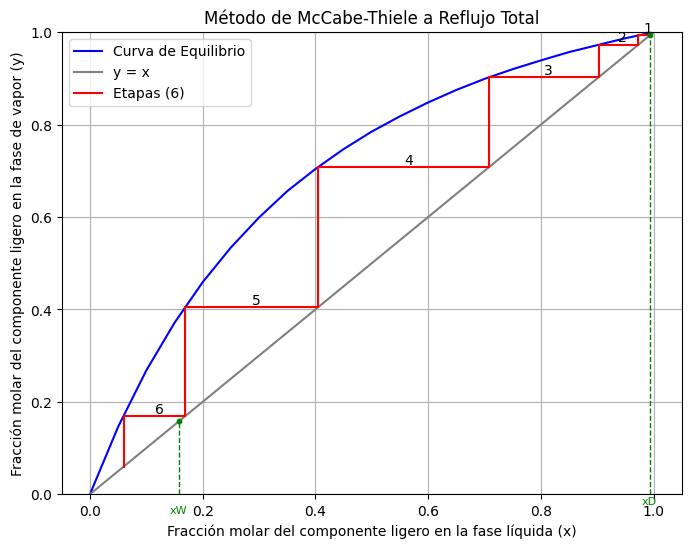

Etapa,x,y,linea
1,0.972771,0.992920,curva de equilibrio
2,0.902569,0.972771,curva de equilibrio
3,0.708497,0.902569,curva de equilibrio
4,0.405229,0.708497,curva de equilibrio
5,0.169448,0.405229,curva de equilibrio
6,0.059610,0.169448,curva de equilibrio


In [228]:

s = np.zeros((200, 2))
s[0, 0] = xD
s[0, 1] = xD  # Mover horizontalmente para encontrar el punto de equilibrio
H = 0.99
for i in range(1, 200):
    # Movimiento vertical hacia abajo
    s[i, 1] = s[i-1, 0]  # Mover verticalmente a y = x
    if s[i, 1] <= xW:
        s[i, 0] = s[i, 1]  # En la última etapa, y = x = xW
        break
    # Movimiento horizontal a la curva de equilibrio
    s[i, 0] = np.interp(s[i, 1], y1, x1)

# Limpiar filas con ceros innecesarios
s = s[~np.all(s == 0, axis=1)]
s_rows = s.shape[0]

# Crear un DataFrame para almacenar las etapas
data = {
    'Etapa': [],
    'x': [],
    'y': [],
    'linea': []
}

S = np.zeros((s_rows * 2, 2))
for i in range(0, s_rows):
    S[i * 2, 0] = s[i, 0]  # Coordenada x de la etapa actual
    S[i * 2, 1] = s[i, 1]  # Coordenada y de la etapa actual
    
    if i < s_rows - 1:
        S[i * 2 + 1, 0] = s[i, 0]  # x permanece igual para el movimiento vertical
        S[i * 2 + 1, 1] = s[i + 1, 1]  # y de la siguiente etapa
    else:
        S[i * 2 + 1, 0] = s[i, 0]
        S[i * 2 + 1, 1] = s[i, 0]  # y = x para la última etapa

for i in range(1, s_rows-1):
    data['Etapa'].append(i)
    data['x'].append(s[i, 0])
    data['y'].append(s[i, 1])
    data['linea'].append('curva de equilibrio')

df = pd.DataFrame(data)

# Calcular las etapas exactas
x_ult_etapa = data['x'][-1]
x_penult = data['x'][-2]
tolerancia = 1e-5
if np.abs(x_ult_etapa - x_penult) < tolerancia:
    ultima_etapa_exacta = 0
    Nt_etapas = len(data['Etapa'])  
else:
    ultima_etapa_exacta = (xW - x_ult_etapa) / (x_penult - x_ult_etapa)
    Nt_etapas = s_rows - 3 + ultima_etapa_exacta

Etapas_frame = pd.DataFrame({
    'etapas teoricas': [len(data['Etapa'])],
    'etapas exactas': [Nt_etapas],
    'etapas Fenske': (np.log10((xD/xW)* ((1-xW)/(1-xD))))/(np.log10(alpha_media))
})
HETP_frame = pd.DataFrame({
    'HETP McCabbe': [H / Nt_etapas],
    'HETP Fenske': [H / Etapas_frame['etapas Fenske'][0]]
})
display(HETP_frame)
# Guardar resultados en la lista Z
display(Etapas_frame)

# Graficar el diagrama de McCabe-Thiele
plt.figure(figsize=(8, 6))
plt.plot(x1, y1, label='Curva de Equilibrio', color='blue')
plt.plot([0, 1], [0, 1], color='gray', label='y = x ')
plt.plot(S[:, 0], S[:, 1], color='red', label=f'Etapas ({len(data["Etapa"])})')

# Puntos xD y xW
plt.scatter([xD, xW], [xD, xW], color='green', zorder=5, s=10)

# Líneas discontinuas desde el eje x hasta los puntos
plt.plot([xD, xD], [0, xD], color='green', linestyle='--', linewidth=1)
plt.plot([xW, xW], [0, xW], color='green', linestyle='--', linewidth=1)

for i in range(len(data['Etapa'])):
    mid_x = (S[i * 2, 0] + S[i * 2 + 2, 0]) / 2
    y = S[i * 2 + 2, 1]
    plt.text(mid_x, y, f'{i+1}', fontsize=10, verticalalignment='bottom', horizontalalignment='left')

plt.text(xD, -0.005, 'xD', color='green', fontsize=8, verticalalignment='top', horizontalalignment='center')
plt.text(xW, -0.025, 'xW', color='green', fontsize=8, verticalalignment='top', horizontalalignment='center')

plt.ylim(0, 1)
plt.xlabel('Fracción molar del componente ligero en la fase líquida (x)')
plt.ylabel('Fracción molar del componente ligero en la fase de vapor (y)')
plt.title(f'Método de McCabe-Thiele a Reflujo Total')
plt.legend()
plt.grid(True)
plt.show()
display(df.style.hide(axis='index'))


SIN REFLUJO TOTAL, ES DECIR CON ALIMENTACION Y EN CONTINUA


,T(min),TI2,TI3,TI4,TI5,TI10,TI11,TI13,TI12,PD
0,0,85.1,82.7,78.5,62.2,18.8,19.2,64.3,61.9,23
1,4,85.3,83.4,79.5,62.4,18.9,19.2,68.7,61.9,23
2,8,85.5,83.4,79.4,67.7,18.8,19.2,68.4,61.9,23
3,12,85.8,83.5,79.4,75.8,18.8,19.3,72.7,61.9,23


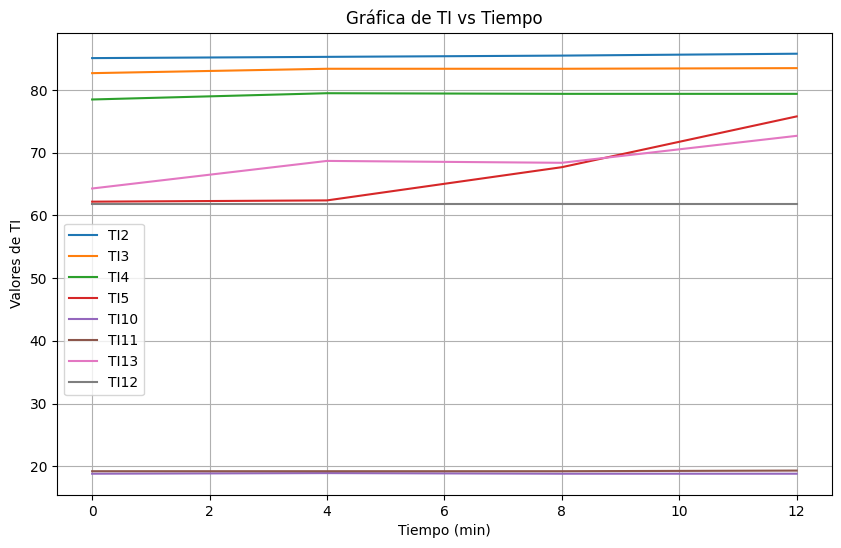

,Fase,Composicion,IR,Q ml /cdot s^{-1}
0,Destilado,0.961062,1.3305,0.073333
1,Residuo,0.079646,1.3803,0.370000
2,Alimentacion,0.125664,1.3777,0.443333


,Entalpia liquido saturado,Entalpia Vapor saturado,Entalpia alimentacion
0,3763.710619,12664.733628,2760.280024


la ecuacion de la linea de operacion en la seccion de enriquecimiento es: y = 9.870591597312018 x + -1.114711510458695
El punto de interseccion es: [0.15063161] [0.37211164]
El minimo reflujo es: [2.65915763]
R/Rmin [0.25070596]
test [0.17858955] [0.64807299]


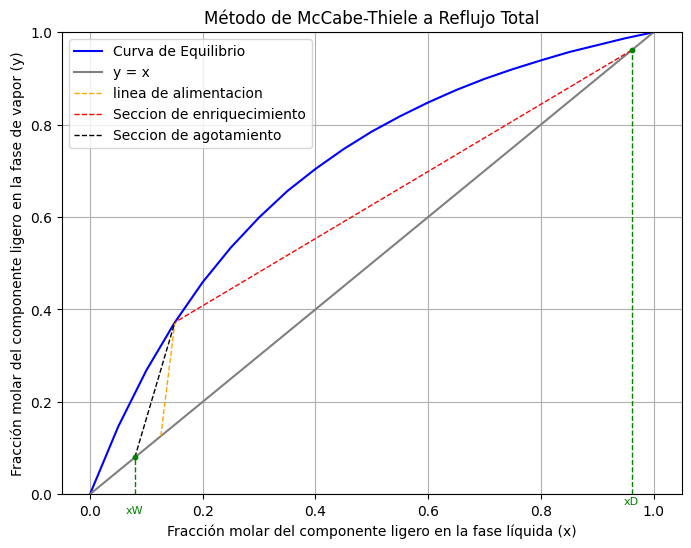

In [229]:
import pandas as pd 
from IPython.display import display
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve
#indices de refraccion, ND
IR_prop = 1.3848
IR_met = 1.3283
IR_destilado = 1.33050
IR_Residuo = 1.38030
IR_alimentacion = 1.37770
VD = 44 #mL
VB = 222 #mL
T = 600 # s 
QD= VD / T # mL/s
QB= VB / T # mL/s
QF = QD + QB
Tref = 0
Tiempo_dest = 15 #s
Tiempo_ref = 10 #s
R= Tiempo_ref / Tiempo_dest
#composicion destilado
xD = (IR_destilado - IR_prop) / (IR_met - IR_prop)
xW = (IR_Residuo - IR_prop) / (IR_met - IR_prop)
xF = (IR_alimentacion - IR_prop) / (IR_met - IR_prop)
yF = np.interp(xF, x1, y1)
#tabla de temperaturas
Tabla= {
    'T(min)' : [0, 4, 8, 12],
    'TI2' : [85.1, 85.3, 85.5,85.8],
    'TI3' : [82.7, 83.4, 83.4, 83.5],
    'TI4' : [78.5, 79.5, 79.4, 79.4],
    'TI5' : [62.2, 62.4, 67.7, 75.8],
    'TI10' : [18.8, 18.9, 18.8, 18.8],
    'TI11' : [19.2, 19.2, 19.2, 19.3],
    'TI13' : [64.3, 68.7, 68.4, 72.7],
    'TI12' : [61.9, 61.9, 61.9, 61.9],
    'PD' : [23, 23, 23, 23], #mmHg
}
Tf = Tabla['TI13'][-1]
cp_prop = 18.1953+0.00505*Tf
cp_met = 31.1753+0.1318*Tf
df = pd.DataFrame(Tabla)
x1 = [0, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95, 1]
y1 = [0, 0.146, 0.268, 0.371, 0.459, 0.534, 0.599, 0.656, 0.704, 0.747, 0.785, 0.818, 0.848, 0.875, 0.899, 0.92, 0.939, 0.957, 0.972, 0.987, 1]

# Mostrar el DataFrame
display(df)
tabla_composicion = {
    'Fase' : ['Destilado', 'Residuo', 'Alimentacion'],
    'Composicion' : [xD, xW, xF],
    'IR' : [IR_destilado, IR_Residuo, IR_alimentacion],
    'Q ml /cdot s^{-1}' : [QD, QB, QF]
}

# Graficar todas las columnas excepto la última ("PD")
plt.figure(figsize=(10, 6))
for column in df.columns[1:-1]:  # Omitir la primera columna y la última columna
    plt.plot(df['T(min)'], df[column], label=column)

plt.xlabel('Tiempo (min)')
plt.ylabel('Valores de TI')
plt.title('Gráfica de TI vs Tiempo')
plt.legend(loc='lower left', bbox_to_anchor=(0, 0.2))
plt.grid(True)
plt.show()
display(pd.DataFrame(tabla_composicion))
y1d = np.interp(xD, x1, y1)
y1r = np.interp(xW, x1, y1)
y2d = 1 - y1d
y2r = 1 - y1r
alpha12d = (y1d / xD) / (y2d / (1 - xD))  # Ajusta el cálculo según tus datos
alpha12r = (y1r / xW) / (y2r / (1 - xW))
alpha_media = np.sqrt(alpha12d * alpha12r)

# Entalpia de vaporizacion de la alimentacion 
Hf = ((xF * cp_prop) + (1 - xF) * cp_met) * (Tf - Tref)
# linea q 

hl = [4316.1, 4084.3, 3867.7, 3665.1, 3474.3, 3294.7, 3124.6, 2963.3, 2810.3, 2664.3, 2525, 2391.7, 2263.9, 
    2141.4, 2023.6, 1910.3, 1800.9, 1695.6, 1593.7, 1495.1, 1399.8]
hv = [14033.1, 13406.7, 12887.7, 12453.3, 12086.3, 11773.4, 11504.7, 11272.2, 11069.3, 10891.5, 10734.7, 
    10595.6, 10471.7, 10360.5, 10260.7, 10170.3, 10088.6, 10013.7, 9945.8, 9883.3, 9825.8]

Hvf = np.interp(yF, y1, hv)
Hlf = np.interp(xF, x1, hl)
q = (Hvf-Hf)/(Hvf-Hlf)

tabla_entalpia = {
    'Entalpia liquido saturado': [Hlf],
    'Entalpia Vapor saturado': [Hvf],
    'Entalpia alimentacion': [Hf]
}
display(pd.DataFrame(tabla_entalpia))
qline = q / (q - 1)
b= xF-qline*xF

#ecuacion LOSE
print('la ecuacion de la linea de operacion en la seccion de enriquecimiento es: y =', qline, 'x +', b)
def qinterc(x):
    yinterc = qline * x + b
    yeq = np.interp(x, x1, y1)
    return yinterc-yeq
xinit = 0.3
xlose = fsolve(qinterc, xinit)
ylose = np.interp(xlose, x1, y1)
print('El punto de interseccion es:', xlose, ylose)
Plose_min = (xD-ylose)/(xD-xlose)
Rmin = Plose_min/(1-Plose_min)
R_RMIN = R/Rmin
print('El minimo reflujo es:', Rmin)
print('R/Rmin', R_RMIN)
def ylost(x):
    ylost=(R/(R+1))*x+((1/(R+1)))*xD
    yinterc = qline * x + b
    return yinterc-ylost
xlost_test = fsolve(ylost, xlose)
ylost=(R/(R+1))*xlost_test +((1/(R+1)))*xD
print('test', xlost_test, ylost)
# Graficar el diagrama de McCabe-Thiele
plt.figure(figsize=(8, 6))
plt.plot(x1, y1, label='Curva de Equilibrio', color='blue')
plt.plot([0, 1], [0, 1], color='gray', label='y = x ')


# Puntos xD y xW
xlose = xlose[0]  # Ensure xlose is a scalar
ylose = ylose[0]  # Ensure ylose is a scalar

plt.scatter([xD, xW], [xD, xW], color='green', zorder=5, s=10)

# Líneas discontinuas desde el eje x hasta los puntos
plt.plot([xD, xD], [0, xD], color='green', linestyle='--', linewidth=1)
plt.plot([xW, xW], [0, xW], color='green', linestyle='--', linewidth=1)
plt.text(xD, -0.005, 'xD', color='green', fontsize=8, verticalalignment='top', horizontalalignment='center')
plt.text(xW, -0.025, 'xW', color='green', fontsize=8, verticalalignment='top', horizontalalignment='center')
plt.plot([xF, xlose], [xF, ylose], color='orange', linestyle='--', linewidth=1, label='linea de alimentacion')
plt.plot([xD, xlose], [xD, ylose], color='r', linestyle='--', linewidth=1, label='Seccion de enriquecimiento')
plt.plot([xW, xlose], [xW, ylose], color='black', linestyle='--', linewidth=1, label='Seccion de agotamiento')

plt.ylim(0, 1)
plt.xlabel('Fracción molar del componente ligero en la fase líquida (x)')
plt.ylabel('Fracción molar del componente ligero en la fase de vapor (y)')
plt.title(f'Método de McCabe-Thiele a Reflujo Total')
plt.legend()
plt.grid(True)
plt.show()


Punto de pinch en la linea de alimentacion: 0.3721116423023838 11182.470955536926


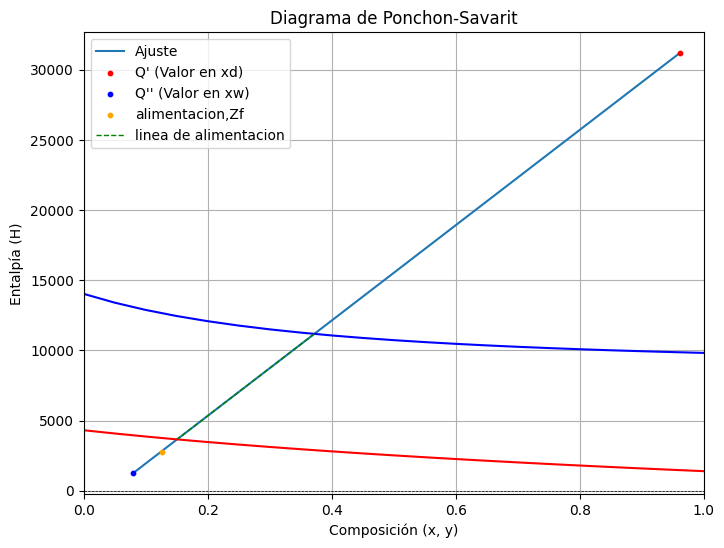

,Rmin Ponchon,Rmin McCabe
0,2.059677,2.659158


In [230]:
# punto pinch linea alimentacion
hqalim_x, hqalim_y = ylose, np.interp(ylose, x1, hv)
hqaliminf_x, hqaliminf_y = xlose, np.interp(ylose, y1, hl)
print('Punto de pinch en la linea de alimentacion:', hqalim_x, hqalim_y)
hqx = [hqalim_x, hqaliminf_x]
hqy = [hqalim_y, hqaliminf_y]
coeffs = np.polyfit(hqx, hqy, 1)
polynomial = np.poly1d(coeffs)
#valores en xd, xw
value_at_xd = polynomial(xD)
value_at_xw = polynomial(xW)
# linspace para el grafico
x_fit = np.linspace(xW, xD, 100)
y_fit = polynomial(x_fit)
plt.figure(figsize=(8, 6))
plt.plot(x_fit, y_fit, '-', label='Ajuste')
plt.scatter(xD, value_at_xd, color='red', label='Q\' (Valor en xd)', s=10,zorder=5)
plt.scatter(xW, value_at_xw, color='blue', label='Q\'\' (Valor en xw)', s=10, zorder=5)
plt.scatter(xF, Hf, color='orange', label='alimentacion,Zf', s=10, zorder=5)
plt.plot(x1, hl, label='', color='red')
plt.plot(x1, hv, color='blue')
plt.plot([hqalim_x, hqaliminf_x], [hqalim_y, hqaliminf_y], color='green', linestyle='--', linewidth=1, label='linea de alimentacion')
plt.title('Diagrama de Ponchon-Savarit')
plt.xlabel('Composición (x, y)')
plt.ylabel('Entalpía (H)')
plt.axhline(0, color='black', lw=0.5, ls='--')
plt.axvline(0, color='black', lw=0.5, ls='--')
plt.grid(True)
plt.legend()
plt.xlim(0, 1)
plt.show()
h0liq = np.interp(xD, x1, hl)
h0vap = np.interp(xD, x1, hv)
Rminponchon =(value_at_xd-h0vap)/(h0vap-h0liq) # R = (Q'y -Hv)/(Hv-Hl)
Rmindf = pd.DataFrame({
    'Rmin Ponchon': [Rminponchon],
    'Rmin McCabe': [Rmin[0]]
})
display(Rmindf)


In [231]:
import numpy as np
from IPython.display import display
# Pega aquí los datos de las columnas tal cual están
datos = """
97.231     1.013   0.00000   0.00000    1.635    1.000    1.000    1.000 
   96.954     1.013   0.00250   0.01292    1.632    1.000    1.000    1.000 
   96.680     1.013   0.00500   0.02556    1.629    1.000    1.000    1.000 
   96.409     1.013   0.00750   0.03793    1.625    1.000    1.000    1.000 
   96.142     1.013   0.01000   0.05004    1.622    1.000    1.000    1.000 
   95.879     1.013   0.01250   0.06190    1.619    1.000    1.000    1.000 
   95.618     1.013   0.01500   0.07352    1.616    1.000    1.000    1.000 
   95.361     1.013   0.01750   0.08490    1.613    1.000    1.000    1.000 
   95.107     1.013   0.02000   0.09606    1.610    1.000    1.000    1.000 
   94.856     1.013   0.02250   0.10699    1.607    1.000    1.000    1.000 
   94.608     1.013   0.02500   0.11770    1.604    1.000    1.000    1.000 
   94.363     1.013   0.02750   0.12821    1.601    1.000    1.000    1.000 
   94.121     1.013   0.03000   0.13851    1.598    1.000    1.000    1.000 
   93.882     1.013   0.03250   0.14862    1.595    1.000    1.000    1.000 
   93.646     1.013   0.03500   0.15853    1.592    1.000    1.000    1.000 
   93.412     1.013   0.03750   0.16825    1.589    1.000    1.000    1.000 
   93.181     1.013   0.04000   0.17780    1.586    1.000    1.000    1.000 
   92.952     1.013   0.04250   0.18717    1.583    1.000    1.000    1.000 
   92.726     1.013   0.04500   0.19636    1.581    1.000    1.000    1.000 
   92.503     1.013   0.04750   0.20539    1.578    1.000    1.000    1.000 
   92.282     1.013   0.05000   0.21426    1.575    1.000    1.000    1.000 
   92.063     1.013   0.05250   0.22297    1.572    1.001    1.000    1.000 
   91.847     1.013   0.05500   0.23152    1.570    1.001    1.000    1.000 
   91.633     1.013   0.05750   0.23993    1.567    1.001    1.000    1.000 
   91.421     1.013   0.06000   0.24818    1.564    1.001    1.000    1.000 
   91.212     1.013   0.06250   0.25630    1.561    1.001    1.000    1.000 
   91.005     1.013   0.06500   0.26427    1.559    1.001    1.000    1.000 
   90.800     1.013   0.06750   0.27211    1.556    1.001    1.000    1.000 
   90.597     1.013   0.07000   0.27982    1.554    1.001    1.000    1.000 
   90.396     1.013   0.07250   0.28740    1.551    1.001    1.000    1.000 
   90.197     1.013   0.07500   0.29486    1.548    1.001    1.000    1.000 
   90.000     1.013   0.07750   0.30219    1.546    1.001    1.000    1.000 
   89.805     1.013   0.08000   0.30940    1.543    1.001    1.000    1.000 
   89.612     1.013   0.08250   0.31649    1.541    1.001    1.000    1.000 
   89.421     1.013   0.08500   0.32347    1.538    1.001    1.000    1.000 
   89.232     1.013   0.08750   0.33034    1.536    1.002    1.000    1.000 
   89.045     1.013   0.09000   0.33710    1.533    1.002    1.000    1.000 
   88.859     1.013   0.09250   0.34375    1.531    1.002    1.000    1.000 
   88.675     1.013   0.09500   0.35030    1.528    1.002    1.000    1.000 
   88.493     1.013   0.09750   0.35675    1.526    1.002    1.000    1.000 
   88.313     1.013   0.10000   0.36310    1.523    1.002    1.000    1.000 
   88.135     1.013   0.10250   0.36935    1.521    1.002    1.000    1.000 
   87.958     1.013   0.10500   0.37551    1.518    1.002    1.000    1.000 
   87.783     1.013   0.10750   0.38157    1.516    1.002    1.000    1.000 
   87.609     1.013   0.11000   0.38754    1.514    1.002    1.000    1.000 
   87.437     1.013   0.11250   0.39343    1.511    1.003    1.000    1.000 
   87.267     1.013   0.11500   0.39922    1.509    1.003    1.000    1.000 
   87.098     1.013   0.11750   0.40494    1.507    1.003    1.000    1.000 
   86.930     1.013   0.12000   0.41056    1.504    1.003    1.000    1.000 
   86.765     1.013   0.12250   0.41611    1.502    1.003    1.000    1.000 
   86.600     1.013   0.12500   0.42158    1.500    1.003    1.000    1.000 
   86.437     1.013   0.12750   0.42697    1.497    1.003    1.000    1.000 
   86.276     1.013   0.13000   0.43228    1.495    1.004    1.000    1.000 
   86.116     1.013   0.13250   0.43752    1.493    1.004    1.000    1.000 
   85.957     1.013   0.13500   0.44268    1.490    1.004    1.000    1.000 
   85.800     1.013   0.13750   0.44777    1.488    1.004    1.000    1.000 
   85.644     1.013   0.14000   0.45279    1.486    1.004    1.000    1.000 
   85.490     1.013   0.14250   0.45775    1.484    1.004    1.000    1.000 
   85.337     1.013   0.14500   0.46263    1.481    1.004    1.000    1.000 
   85.185     1.013   0.14750   0.46745    1.479    1.005    1.000    1.000 
   85.034     1.013   0.15000   0.47220    1.477    1.005    1.000    1.000 
   84.885     1.013   0.15250   0.47689    1.475    1.005    1.000    1.000 
   84.737     1.013   0.15500   0.48152    1.472    1.005    1.000    1.000 
   84.590     1.013   0.15750   0.48608    1.470    1.005    1.000    1.000 
   84.445     1.013   0.16000   0.49059    1.468    1.006    1.000    1.000 
   84.300     1.013   0.16250   0.49503    1.466    1.006    1.000    1.000 
   84.157     1.013   0.16500   0.49942    1.464    1.006    1.000    1.000 
   84.015     1.013   0.16750   0.50375    1.461    1.006    1.000    1.000 
   83.874     1.013   0.17000   0.50802    1.459    1.006    1.000    1.000 
   83.735     1.013   0.17250   0.51224    1.457    1.007    1.000    1.000 
   83.596     1.013   0.17500   0.51641    1.455    1.007    1.000    1.000 
   83.459     1.013   0.17750   0.52052    1.453    1.007    1.000    1.000 
   83.323     1.013   0.18000   0.52458    1.451    1.007    1.000    1.000 
   83.187     1.013   0.18250   0.52859    1.449    1.007    1.000    1.000 
   83.053     1.013   0.18500   0.53255    1.446    1.008    1.000    1.000 
   82.920     1.013   0.18750   0.53646    1.444    1.008    1.000    1.000 
   82.788     1.013   0.19000   0.54033    1.442    1.008    1.000    1.000 
   82.657     1.013   0.19250   0.54414    1.440    1.008    1.000    1.000 
   82.528     1.013   0.19500   0.54791    1.438    1.009    1.000    1.000 
   82.399     1.013   0.19750   0.55163    1.436    1.009    1.000    1.000 
   82.271     1.013   0.20000   0.55531    1.434    1.009    1.000    1.000 
   82.144     1.013   0.20250   0.55894    1.432    1.009    1.000    1.000 
   82.018     1.013   0.20500   0.56253    1.430    1.010    1.000    1.000 
   81.893     1.013   0.20750   0.56608    1.428    1.010    1.000    1.000 
   81.769     1.013   0.21000   0.56959    1.426    1.010    1.000    1.000 
   81.646     1.013   0.21250   0.57305    1.423    1.010    1.000    1.000 
   81.524     1.013   0.21500   0.57647    1.421    1.011    1.000    1.000 
   81.403     1.013   0.21750   0.57986    1.419    1.011    1.000    1.000 
   81.283     1.013   0.22000   0.58320    1.417    1.011    1.000    1.000 
   81.164     1.013   0.22250   0.58651    1.415    1.012    1.000    1.000 
   81.045     1.013   0.22500   0.58977    1.413    1.012    1.000    1.000 
   80.928     1.013   0.22750   0.59300    1.411    1.012    1.000    1.000 
   80.811     1.013   0.23000   0.59620    1.409    1.013    1.000    1.000 
   80.696     1.013   0.23250   0.59935    1.407    1.013    1.000    1.000 
   80.581     1.013   0.23500   0.60248    1.405    1.013    1.000    1.000 
   80.467     1.013   0.23750   0.60556    1.403    1.014    1.000    1.000 
   80.354     1.013   0.24000   0.60861    1.401    1.014    1.000    1.000 
   80.242     1.013   0.24250   0.61163    1.399    1.014    1.000    1.000 
   80.130     1.013   0.24500   0.61462    1.397    1.015    1.000    1.000 
   80.020     1.013   0.24750   0.61757    1.395    1.015    1.000    1.000 
   79.910     1.013   0.25000   0.62049    1.393    1.015    1.000    1.000 
   79.801     1.013   0.25250   0.62338    1.391    1.016    1.000    1.000 
   79.693     1.013   0.25500   0.62623    1.389    1.016    1.000    1.000 
   79.585     1.013   0.25750   0.62906    1.387    1.016    1.000    1.000 
   79.479     1.013   0.26000   0.63185    1.385    1.017    1.000    1.000 
   79.373     1.013   0.26250   0.63462    1.383    1.017    1.000    1.000 
   79.268     1.013   0.26500   0.63735    1.381    1.018    1.000    1.000 
   79.163     1.013   0.26750   0.64006    1.379    1.018    1.000    1.000 
   79.060     1.013   0.27000   0.64274    1.377    1.018    1.000    1.000 
   78.957     1.013   0.27250   0.64539    1.375    1.019    1.000    1.000 
   78.855     1.013   0.27500   0.64801    1.373    1.019    1.000    1.000 
   78.753     1.013   0.27750   0.65061    1.371    1.020    1.000    1.000 
   78.653     1.013   0.28000   0.65318    1.370    1.020    1.000    1.000 
   78.553     1.013   0.28250   0.65572    1.368    1.021    1.000    1.000 
   78.454     1.013   0.28500   0.65823    1.366    1.021    1.000    1.000 
   78.355     1.013   0.28750   0.66072    1.364    1.021    1.000    1.000 
   78.257     1.013   0.29000   0.66319    1.362    1.022    1.000    1.000 
   78.160     1.013   0.29250   0.66563    1.360    1.022    1.000    1.000 
   78.064     1.013   0.29500   0.66804    1.358    1.023    1.000    1.000 
   77.968     1.013   0.29750   0.67043    1.356    1.023    1.000    1.000 
   77.873     1.013   0.30000   0.67280    1.354    1.024    1.000    1.000 
   77.778     1.013   0.30250   0.67514    1.352    1.024    1.000    1.000 
   77.685     1.013   0.30500   0.67746    1.350    1.025    1.000    1.000 
   77.592     1.013   0.30750   0.67976    1.348    1.025    1.000    1.000 
   77.499     1.013   0.31000   0.68204    1.346    1.026    1.000    1.000 
   77.407     1.013   0.31250   0.68429    1.345    1.026    1.000    1.000 
   77.316     1.013   0.31500   0.68652    1.343    1.027    1.000    1.000 
   77.226     1.013   0.31750   0.68873    1.341    1.028    1.000    1.000 
   77.136     1.013   0.32000   0.69091    1.339    1.028    1.000    1.000 
   77.046     1.013   0.32250   0.69308    1.337    1.029    1.000    1.000 
   76.958     1.013   0.32500   0.69523    1.335    1.029    1.000    1.000 
   76.870     1.013   0.32750   0.69735    1.333    1.030    1.000    1.000 
   76.782     1.013   0.33000   0.69946    1.331    1.030    1.000    1.000 
   76.695     1.013   0.33250   0.70154    1.329    1.031    1.000    1.000 
   76.609     1.013   0.33500   0.70361    1.327    1.032    1.000    1.000 
   76.523     1.013   0.33750   0.70566    1.326    1.032    1.000    1.000 
   76.438     1.013   0.34000   0.70768    1.324    1.033    1.000    1.000 
   76.354     1.013   0.34250   0.70969    1.322    1.033    1.000    1.000 
   76.270     1.013   0.34500   0.71168    1.320    1.034    1.000    1.000 
   76.186     1.013   0.34750   0.71365    1.318    1.035    1.000    1.000 
   76.103     1.013   0.35000   0.71561    1.316    1.035    1.000    1.000 
   76.021     1.013   0.35250   0.71754    1.314    1.036    1.000    1.000 
   75.939     1.013   0.35500   0.71946    1.313    1.037    1.000    1.000 
   75.858     1.013   0.35750   0.72136    1.311    1.037    1.000    1.000 
   75.778     1.013   0.36000   0.72325    1.309    1.038    1.000    1.000 
   75.697     1.013   0.36250   0.72512    1.307    1.039    1.000    1.000 
   75.618     1.013   0.36500   0.72697    1.305    1.039    1.000    1.000 
   75.539     1.013   0.36750   0.72880    1.303    1.040    1.000    1.000 
   75.460     1.013   0.37000   0.73062    1.301    1.041    1.000    1.000 
   75.382     1.013   0.37250   0.73242    1.300    1.042    1.000    1.000 
   75.305     1.013   0.37500   0.73421    1.298    1.042    1.000    1.000 
   75.228     1.013   0.37750   0.73598    1.296    1.043    1.000    1.000 
   75.152     1.013   0.38000   0.73773    1.294    1.044    1.000    1.000 
   75.076     1.013   0.38250   0.73947    1.292    1.045    1.000    1.000 
   75.000     1.013   0.38500   0.74120    1.290    1.045    1.000    1.000 
   74.925     1.013   0.38750   0.74291    1.289    1.046    1.000    1.000 
   74.851     1.013   0.39000   0.74460    1.287    1.047    1.000    1.000 
   74.777     1.013   0.39250   0.74629    1.285    1.048    1.000    1.000 
   74.703     1.013   0.39500   0.74795    1.283    1.049    1.000    1.000 
   74.630     1.013   0.39750   0.74961    1.281    1.050    1.000    1.000 
   74.558     1.013   0.40000   0.75125    1.280    1.050    1.000    1.000 
   74.486     1.013   0.40250   0.75287    1.278    1.051    1.000    1.000 
   74.414     1.013   0.40500   0.75449    1.276    1.052    1.000    1.000 
   74.343     1.013   0.40750   0.75609    1.274    1.053    1.000    1.000 
   74.272     1.013   0.41000   0.75767    1.272    1.054    1.000    1.000 
   74.202     1.013   0.41250   0.75924    1.271    1.055    1.000    1.000 
   74.132     1.013   0.41500   0.76081    1.269    1.056    1.000    1.000 
   74.063     1.013   0.41750   0.76235    1.267    1.057    1.000    1.000 
   73.994     1.013   0.42000   0.76389    1.265    1.058    1.000    1.000 
   73.926     1.013   0.42250   0.76541    1.263    1.059    1.000    1.000 
   73.858     1.013   0.42500   0.76692    1.262    1.060    1.000    1.000 
   73.790     1.013   0.42750   0.76842    1.260    1.061    1.000    1.000 
   73.723     1.013   0.43000   0.76991    1.258    1.062    1.000    1.000 
   73.657     1.013   0.43250   0.77139    1.256    1.063    1.000    1.000 
   73.590     1.013   0.43500   0.77285    1.254    1.064    1.000    1.000 
   73.524     1.013   0.43750   0.77430    1.253    1.065    1.000    1.000 
   73.459     1.013   0.44000   0.77574    1.251    1.066    1.000    1.000 
   73.394     1.013   0.44250   0.77718    1.249    1.067    1.000    1.000 
   73.329     1.013   0.44500   0.77860    1.247    1.068    1.000    1.000 
   73.265     1.013   0.44750   0.78000    1.246    1.069    1.000    1.000 
   73.201     1.013   0.45000   0.78140    1.244    1.070    1.000    1.000 
   73.138     1.013   0.45250   0.78279    1.242    1.071    1.000    1.000 
   73.075     1.013   0.45500   0.78417    1.240    1.072    1.000    1.000 
   73.012     1.013   0.45750   0.78553    1.239    1.073    1.000    1.000 
   72.950     1.013   0.46000   0.78689    1.237    1.074    1.000    1.000 
   72.888     1.013   0.46250   0.78824    1.235    1.076    1.000    1.000 
   72.827     1.013   0.46500   0.78958    1.233    1.077    1.000    1.000 
   72.766     1.013   0.46750   0.79090    1.232    1.078    1.000    1.000 
   72.705     1.013   0.47000   0.79222    1.230    1.079    1.000    1.000 
   72.645     1.013   0.47250   0.79353    1.228    1.080    1.000    1.000 
   72.585     1.013   0.47500   0.79483    1.227    1.082    1.000    1.000 
   72.525     1.013   0.47750   0.79612    1.225    1.083    1.000    1.000 
   72.466     1.013   0.48000   0.79740    1.223    1.084    1.000    1.000 
   72.407     1.013   0.48250   0.79867    1.221    1.085    1.000    1.000 
   72.349     1.013   0.48500   0.79994    1.220    1.087    1.000    1.000 
   72.291     1.013   0.48750   0.80119    1.218    1.088    1.000    1.000 
   72.233     1.013   0.49000   0.80244    1.216    1.089    1.000    1.000 
   72.175     1.013   0.49250   0.80367    1.215    1.091    1.000    1.000 
   72.118     1.013   0.49500   0.80490    1.213    1.092    1.000    1.000 
   72.062     1.013   0.49750   0.80612    1.211    1.093    1.000    1.000 
   72.005     1.013   0.50000   0.80734    1.209    1.095    1.000    1.000 
   71.949     1.013   0.50250   0.80854    1.208    1.096    1.000    1.000 
   71.894     1.013   0.50500   0.80974    1.206    1.098    1.000    1.000 
   71.838     1.013   0.50750   0.81093    1.204    1.099    1.000    1.000 
   71.783     1.013   0.51000   0.81211    1.203    1.100    1.000    1.000 
   71.728     1.013   0.51250   0.81328    1.201    1.102    1.000    1.000 
   71.674     1.013   0.51500   0.81445    1.199    1.103    1.000    1.000 
   71.620     1.013   0.51750   0.81560    1.198    1.105    1.000    1.000 
   71.566     1.013   0.52000   0.81676    1.196    1.106    1.000    1.000 
   71.513     1.013   0.52250   0.81790    1.194    1.108    1.000    1.000 
   71.460     1.013   0.52500   0.81904    1.193    1.109    1.000    1.000 
   71.407     1.013   0.52750   0.82017    1.191    1.111    1.000    1.000 
   71.354     1.013   0.53000   0.82129    1.189    1.113    1.000    1.000 
   71.302     1.013   0.53250   0.82240    1.188    1.114    1.000    1.000 
   71.250     1.013   0.53500   0.82351    1.186    1.116    1.000    1.000 
   71.198     1.013   0.53750   0.82462    1.185    1.118    1.000    1.000 
   71.147     1.013   0.54000   0.82571    1.183    1.119    1.000    1.000 
   71.096     1.013   0.54250   0.82680    1.181    1.121    1.000    1.000 
   71.045     1.013   0.54500   0.82788    1.180    1.123    1.000    1.000 
   70.995     1.013   0.54750   0.82896    1.178    1.124    1.000    1.000 
   70.945     1.013   0.55000   0.83003    1.176    1.126    1.000    1.000 
   70.895     1.013   0.55250   0.83110    1.175    1.128    1.000    1.000 
   70.845     1.013   0.55500   0.83215    1.173    1.130    1.000    1.000 
   70.796     1.013   0.55750   0.83321    1.172    1.131    1.000    1.000 
   70.747     1.013   0.56000   0.83425    1.170    1.133    1.000    1.000 
   70.698     1.013   0.56250   0.83530    1.168    1.135    1.000    1.000 
   70.650     1.013   0.56500   0.83633    1.167    1.137    1.000    1.000 
   70.601     1.013   0.56750   0.83736    1.165    1.139    1.000    1.000 
   70.554     1.013   0.57000   0.83838    1.164    1.141    1.000    1.000 
   70.506     1.013   0.57250   0.83940    1.162    1.143    1.000    1.000 
   70.458     1.013   0.57500   0.84042    1.160    1.145    1.000    1.000 
   70.411     1.013   0.57750   0.84143    1.159    1.147    1.000    1.000 
   70.364     1.013   0.58000   0.84243    1.157    1.149    1.000    1.000 
   70.318     1.013   0.58250   0.84343    1.156    1.151    1.000    1.000 
   70.271     1.013   0.58500   0.84442    1.154    1.153    1.000    1.000 
   70.225     1.013   0.58750   0.84541    1.153    1.155    1.000    1.000 
   70.179     1.013   0.59000   0.84639    1.151    1.157    1.000    1.000 
   70.133     1.013   0.59250   0.84737    1.150    1.159    1.000    1.000 
   70.088     1.013   0.59500   0.84834    1.148    1.161    1.000    1.000 
   70.043     1.013   0.59750   0.84931    1.146    1.163    1.000    1.000 
   69.998     1.013   0.60000   0.85028    1.145    1.165    1.000    1.000 
   69.953     1.013   0.60250   0.85124    1.143    1.168    1.000    1.000 
   69.909     1.013   0.60500   0.85220    1.142    1.170    1.000    1.000 
   69.864     1.013   0.60750   0.85315    1.140    1.172    1.000    1.000 
   69.820     1.013   0.61000   0.85410    1.139    1.174    1.000    1.000 
   69.777     1.013   0.61250   0.85504    1.137    1.177    1.000    1.000 
   69.733     1.013   0.61500   0.85598    1.136    1.179    1.000    1.000 
   69.690     1.013   0.61750   0.85691    1.134    1.181    1.000    1.000 
   69.646     1.013   0.62000   0.85785    1.133    1.184    1.000    1.000 
   69.604     1.013   0.62250   0.85877    1.131    1.186    1.000    1.000 
   69.561     1.013   0.62500   0.85970    1.130    1.189    1.000    1.000 
   69.518     1.013   0.62750   0.86062    1.128    1.191    1.000    1.000 
   69.476     1.013   0.63000   0.86154    1.127    1.194    1.000    1.000 
   69.434     1.013   0.63250   0.86245    1.126    1.196    1.000    1.000 
   69.392     1.013   0.63500   0.86336    1.124    1.199    1.000    1.000 
   69.350     1.013   0.63750   0.86426    1.123    1.201    1.000    1.000 
   69.309     1.013   0.64000   0.86517    1.121    1.204    1.000    1.000 
   69.267     1.013   0.64250   0.86607    1.120    1.206    1.000    1.000 
   69.226     1.013   0.64500   0.86696    1.118    1.209    1.000    1.000 
   69.185     1.013   0.64750   0.86786    1.117    1.212    1.000    1.000 
   69.145     1.013   0.65000   0.86875    1.115    1.214    1.000    1.000 
   69.104     1.013   0.65250   0.86964    1.114    1.217    1.000    1.000 
   69.064     1.013   0.65500   0.87052    1.113    1.220    1.000    1.000 
   69.024     1.013   0.65750   0.87140    1.111    1.223    1.000    1.000 
   68.984     1.013   0.66000   0.87228    1.110    1.226    1.000    1.000 
   68.944     1.013   0.66250   0.87316    1.108    1.228    1.000    1.000 
   68.904     1.013   0.66500   0.87403    1.107    1.231    1.000    1.000 
   68.865     1.013   0.66750   0.87490    1.106    1.234    1.000    1.000 
   68.825     1.013   0.67000   0.87577    1.104    1.237    1.000    1.000 
   68.786     1.013   0.67250   0.87664    1.103    1.240    1.000    1.000 
   68.748     1.013   0.67500   0.87750    1.102    1.243    1.000    1.000 
   68.709     1.013   0.67750   0.87837    1.100    1.246    1.000    1.000 
   68.670     1.013   0.68000   0.87923    1.099    1.249    1.000    1.000 
   68.632     1.013   0.68250   0.88008    1.098    1.253    1.000    1.000 
   68.593     1.013   0.68500   0.88094    1.096    1.256    1.000    1.000 
   68.555     1.013   0.68750   0.88179    1.095    1.259    1.000    1.000 
   68.517     1.013   0.69000   0.88265    1.094    1.262    1.000    1.000 
   68.480     1.013   0.69250   0.88350    1.092    1.265    1.000    1.000 
   68.442     1.013   0.69500   0.88434    1.091    1.269    1.000    1.000 
   68.404     1.013   0.69750   0.88519    1.090    1.272    1.000    1.000 
   68.367     1.013   0.70000   0.88604    1.088    1.275    1.000    1.000 
   68.330     1.013   0.70250   0.88688    1.087    1.279    1.000    1.000 
   68.293     1.013   0.70500   0.88772    1.086    1.282    1.000    1.000 
   68.256     1.013   0.70750   0.88856    1.084    1.286    1.000    1.000 
   68.219     1.013   0.71000   0.88940    1.083    1.289    1.000    1.000 
   68.182     1.013   0.71250   0.89024    1.082    1.293    1.000    1.000 
   68.146     1.013   0.71500   0.89108    1.081    1.296    1.000    1.000 
   68.110     1.013   0.71750   0.89191    1.079    1.300    1.000    1.000 
   68.073     1.013   0.72000   0.89275    1.078    1.304    1.000    1.000 
   68.037     1.013   0.72250   0.89358    1.077    1.307    1.000    1.000 
   68.001     1.013   0.72500   0.89441    1.076    1.311    1.000    1.000 
   67.965     1.013   0.72750   0.89525    1.075    1.315    1.000    1.000 
   67.930     1.013   0.73000   0.89608    1.073    1.319    1.000    1.000 
   67.894     1.013   0.73250   0.89691    1.072    1.323    1.000    1.000 
   67.859     1.013   0.73500   0.89774    1.071    1.327    1.000    1.000 
   67.823     1.013   0.73750   0.89857    1.070    1.331    1.000    1.000 
   67.788     1.013   0.74000   0.89939    1.069    1.335    1.000    1.000 
   67.753     1.013   0.74250   0.90022    1.067    1.339    1.000    1.000 
   67.718     1.013   0.74500   0.90105    1.066    1.343    1.000    1.000 
   67.683     1.013   0.74750   0.90188    1.065    1.347    1.000    1.000 
   67.648     1.013   0.75000   0.90271    1.064    1.351    1.000    1.000 
   67.613     1.013   0.75250   0.90353    1.063    1.355    1.000    1.000 
   67.579     1.013   0.75500   0.90436    1.062    1.360    1.000    1.000 
   67.544     1.013   0.75750   0.90519    1.061    1.364    1.000    1.000 
   67.510     1.013   0.76000   0.90602    1.059    1.368    1.000    1.000 
   67.476     1.013   0.76250   0.90684    1.058    1.373    1.000    1.000 
   67.441     1.013   0.76500   0.90767    1.057    1.377    1.000    1.000 
   67.407     1.013   0.76750   0.90850    1.056    1.382    1.000    1.000 
   67.373     1.013   0.77000   0.90933    1.055    1.386    1.000    1.000 
   67.339     1.013   0.77250   0.91016    1.054    1.391    1.000    1.000 
   67.306     1.013   0.77500   0.91099    1.053    1.396    1.000    1.000 
   67.272     1.013   0.77750   0.91182    1.052    1.400    1.000    1.000 
   67.238     1.013   0.78000   0.91265    1.051    1.405    1.000    1.000 
   67.205     1.013   0.78250   0.91348    1.050    1.410    1.000    1.000 
   67.171     1.013   0.78500   0.91431    1.049    1.415    1.000    1.000 
   67.138     1.013   0.78750   0.91515    1.048    1.420    1.000    1.000 
   67.105     1.013   0.79000   0.91598    1.047    1.425    1.000    1.000 
   67.071     1.013   0.79250   0.91682    1.046    1.430    1.000    1.000 
   67.038     1.013   0.79500   0.91765    1.045    1.435    1.000    1.000 
   67.005     1.013   0.79750   0.91849    1.044    1.440    1.000    1.000 
   66.972     1.013   0.80000   0.91933    1.043    1.445    1.000    1.000 
   66.939     1.013   0.80250   0.92017    1.042    1.451    1.000    1.000 
   66.907     1.013   0.80500   0.92101    1.041    1.456    1.000    1.000 
   66.874     1.013   0.80750   0.92186    1.040    1.461    1.000    1.000 
   66.841     1.013   0.81000   0.92270    1.039    1.467    1.000    1.000 
   66.809     1.013   0.81250   0.92355    1.038    1.472    1.000    1.000 
   66.776     1.013   0.81500   0.92440    1.037    1.478    1.000    1.000 
   66.744     1.013   0.81750   0.92525    1.036    1.484    1.000    1.000 
   66.711     1.013   0.82000   0.92610    1.035    1.489    1.000    1.000 
   66.679     1.013   0.82250   0.92696    1.034    1.495    1.000    1.000 
   66.647     1.013   0.82500   0.92782    1.033    1.501    1.000    1.000 
   66.614     1.013   0.82750   0.92868    1.032    1.507    1.000    1.000 
   66.582     1.013   0.83000   0.92954    1.032    1.513    1.000    1.000 
   66.550     1.013   0.83250   0.93040    1.031    1.519    1.000    1.000 
   66.518     1.013   0.83500   0.93127    1.030    1.525    1.000    1.000 
   66.486     1.013   0.83750   0.93214    1.029    1.531    1.000    1.000 
   66.454     1.013   0.84000   0.93301    1.028    1.537    1.000    1.000 
   66.422     1.013   0.84250   0.93389    1.027    1.544    1.000    1.000 
   66.390     1.013   0.84500   0.93477    1.027    1.550    1.000    1.000 
   66.358     1.013   0.84750   0.93565    1.026    1.557    1.000    1.000 
   66.327     1.013   0.85000   0.93653    1.025    1.563    1.000    1.000 
   66.295     1.013   0.85250   0.93742    1.024    1.570    1.000    1.000 
   66.263     1.013   0.85500   0.93831    1.024    1.576    1.000    1.000 
   66.232     1.013   0.85750   0.93921    1.023    1.583    1.000    1.000 
   66.200     1.013   0.86000   0.94011    1.022    1.590    1.000    1.000 
   66.169     1.013   0.86250   0.94101    1.021    1.597    1.000    1.000 
   66.137     1.013   0.86500   0.94191    1.021    1.604    1.000    1.000 
   66.106     1.013   0.86750   0.94282    1.020    1.611    1.000    1.000 
   66.074     1.013   0.87000   0.94374    1.019    1.618    1.000    1.000 
   66.043     1.013   0.87250   0.94465    1.018    1.625    1.000    1.000 
   66.012     1.013   0.87500   0.94557    1.018    1.633    1.000    1.000 
   65.980     1.013   0.87750   0.94650    1.017    1.640    1.000    1.000 
   65.949     1.013   0.88000   0.94743    1.016    1.648    1.000    1.000 
   65.918     1.013   0.88250   0.94837    1.016    1.655    1.000    1.000 
   65.887     1.013   0.88500   0.94931    1.015    1.663    1.000    1.000 
   65.856     1.013   0.88750   0.95025    1.015    1.671    1.000    1.000 
   65.825     1.013   0.89000   0.95120    1.014    1.678    1.000    1.000 
   65.793     1.013   0.89250   0.95215    1.013    1.686    1.000    1.000 
   65.762     1.013   0.89500   0.95311    1.013    1.694    1.000    1.000 
   65.731     1.013   0.89750   0.95408    1.012    1.702    1.000    1.000 
   65.700     1.013   0.90000   0.95505    1.012    1.711    1.000    1.000 
   65.669     1.013   0.90250   0.95602    1.011    1.719    1.000    1.000 
   65.638     1.013   0.90500   0.95700    1.011    1.727    1.000    1.000 
   65.608     1.013   0.90750   0.95799    1.010    1.736    1.000    1.000 
   65.577     1.013   0.91000   0.95898    1.010    1.745    1.000    1.000 
   65.546     1.013   0.91250   0.95998    1.009    1.753    1.000    1.000 
   65.515     1.013   0.91500   0.96099    1.009    1.762    1.000    1.000 
   65.484     1.013   0.91750   0.96200    1.008    1.771    1.000    1.000 
   65.453     1.013   0.92000   0.96302    1.008    1.780    1.000    1.000 
   65.423     1.013   0.92250   0.96404    1.007    1.789    1.000    1.000 
   65.392     1.013   0.92500   0.96507    1.007    1.798    1.000    1.000 
   65.361     1.013   0.92750   0.96611    1.006    1.808    1.000    1.000 
   65.331     1.013   0.93000   0.96716    1.006    1.817    1.000    1.000 
   65.300     1.013   0.93250   0.96821    1.005    1.827    1.000    1.000 
   65.269     1.013   0.93500   0.96927    1.005    1.836    1.000    1.000 
   65.239     1.013   0.93750   0.97034    1.005    1.846    1.000    1.000 
   65.208     1.013   0.94000   0.97141    1.004    1.856    1.000    1.000 
   65.177     1.013   0.94250   0.97249    1.004    1.866    1.000    1.000 
   65.147     1.013   0.94500   0.97359    1.004    1.876    1.000    1.000 
   65.116     1.013   0.94750   0.97469    1.003    1.887    1.000    1.000 
   65.086     1.013   0.95000   0.97579    1.003    1.897    1.000    1.000 
   65.055     1.013   0.95250   0.97691    1.003    1.908    1.000    1.000 
   65.025     1.013   0.95500   0.97803    1.002    1.918    1.000    1.000 
   64.995     1.013   0.95750   0.97917    1.002    1.929    1.000    1.000 
   64.964     1.013   0.96000   0.98031    1.002    1.940    1.000    1.000 
   64.934     1.013   0.96250   0.98146    1.002    1.951    1.000    1.000 
   64.904     1.013   0.96500   0.98262    1.002    1.962    1.000    1.000 
   64.873     1.013   0.96750   0.98380    1.001    1.974    1.000    1.000 
   64.843     1.013   0.97000   0.98498    1.001    1.985    1.000    1.000 
   64.813     1.013   0.97250   0.98617    1.001    1.997    1.000    1.000 
   64.782     1.013   0.97500   0.98737    1.001    2.008    1.000    1.000 
   64.752     1.013   0.97750   0.98858    1.001    2.020    1.000    1.000 
   64.722     1.013   0.98000   0.98980    1.001    2.032    1.000    1.000 
   64.692     1.013   0.98250   0.99104    1.000    2.045    1.000    1.000 
   64.662     1.013   0.98500   0.99228    1.000    2.057    1.000    1.000 
   64.632     1.013   0.98750   0.99354    1.000    2.070    1.000    1.000 
   64.602     1.013   0.99000   0.99481    1.000    2.082    1.000    1.000 
   64.572     1.013   0.99250   0.99609    1.000    2.095    1.000    1.000 
   64.542     1.013   0.99500   0.99738    1.000    2.108    1.000    1.000 
   64.512     1.013   0.99750   0.99868    1.000    2.121    1.000    1.000 
   64.482     1.013   1.00000   1.00000    1.000    2.135    1.000    1.000 



""" # 
# Convertir el bloque de datos en una matriz de numpy
# Primero, convertir el bloque de datos a una lista de líneas, y luego a una lista de números
lineas = datos.strip().split('\n')
datos_limpios = [list(map(float, linea.split())) for linea in lineas]

# Convertir los datos a una matriz numpy
matriz = np.array(datos_limpios)

# Extraer cada columna como un vector (lista)
T = matriz[:, 0]
P = matriz[:, 1]
x1 = matriz[:, 2]
y1 = matriz[:, 3]